In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'a2rData_train_ED.csv')
df = pd.read_csv(data_file_path)

In [3]:
from AutoML.analyzer import Analyzer
from pprint import pprint

config = Analyzer.dry_run(df)

pprint(config)

/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data[col] = pd.to_datetime(self.data[col])
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/analyzer.py:172: UserWarning: Could not inf

Config file not found. Creating custom...
Used a heuristic to define categorical and continuous columns. Please review!

Categorical: ['target_ED_visit', 'intent', 'gender', 'disease_site', 'regimen', 'esas_appetite', 'bicarbonate', 'esas_shortness_of_breath', 'esas_drowsiness', 'esas_well_being', 'chloride', 'creatinine', 'potassium', 'cycle_number', 'mean_corpuscular_hemoglobin_concentration', 'phosphate', 'height', 'esas_nausea', 'total_bilirubin', 'num_prior_ED_visits_within_5_years', 'esas_pain', 'mean_platelet_volume', 'esas_anxiety', 'esas_depression', 'albumin', 'magnesium', 'esas_tiredness', 'sodium', 'monocyte', 'age', 'patient_ecog', 'eosinophil', 'hemoglobin']
Continuous: ['weight', 'alkaline_phosphatase', 'body_surface_area', 'lactate_dehydrogenase', 'neutrophil', 'hematocrit', 'red_cell_distribution_width', 'aspartate_aminotransferase', 'glucose', 'alanine_aminotransferase', 'days_since_prev_ED_visit', 'white_blood_cell', 'platelet', 'red_blood_cell', 'mean_corpuscular_vo

/home/joshua-siraj/Documents/CDI/AutoML/.pixi/envs/default/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/joshua-siraj/Documents/CDI/AutoML/src/AutoML/utils/plot.py:189: UserWarning: Tight layout not applied. ti

In [4]:
import yaml

config['columns']['categorical'] = ['gender', 'target_ED_visit', 'intent', 'regimen', 'disease_site']
config['columns']['continuous'] = [
    "glucose",
    "neutrophil",
    "aspartate_aminotransferase",
    "hematocrit",
    "weight",
    "white_blood_cell",
    "red_blood_cell",
    "mean_corpuscular_volume",
    "body_surface_area",
    "red_cell_distribution_width",
    "platelet",
    "mean_corpuscular_hemoglobin",
    "alanine_aminotransferase",
    "days_since_prev_ED_visit",
    "lactate_dehydrogenase",
    "lymphocyte",
    "alkaline_phosphatase",
    "esas_nausea",
    "age",
    "hemoglobin",
    "patient_ecog",
    "creatinine",
    "chloride",
    "phosphate",
    "esas_anxiety",
    "sodium",
    "potassium",
    "esas_depression",
    "total_bilirubin",
    "esas_well_being",
    "bicarbonate",
    "eosinophil",
    "height",
    "mean_corpuscular_hemoglobin_concentration",
    "esas_pain",
    "num_prior_ED_visits_within_5_years",
    "albumin",
    "esas_drowsiness",
    "monocyte",
    "cycle_number",
    "esas_shortness_of_breath",
    "esas_tiredness",
    "mean_platelet_volume",
    "esas_appetite",
    "magnesium"
]

with open('a2r_outputs/analyzer/config.yaml', 'w') as f:
            yaml.dump(config, f)

In [5]:
from AutoML.analyzer import Analyzer

analyzer = Analyzer(df, target_variable='target_ED_visit', output_dir='./a2r_outputs/analyzer', config='./a2r_outputs/analyzer/config.yaml')

analyzer.run()

Applying changes from config...

╒══════════════════════════════════════════════════════╤════════════════════════╤═══════════╤════════════════╕
│                                                      │                        │ Missing   │ Overall        │
╞══════════════════════════════════════════════════════╪════════════════════════╪═══════════╪════════════════╡
│ n                                                    │                        │           │ 15484          │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼────────────────┤
│ glucose, mean (SD)                                   │                        │ 0         │ 6.8 (1.9)      │
├──────────────────────────────────────────────────────┼────────────────────────┼───────────┼────────────────┤
│ neutrophil, mean (SD)                                │                        │ 0         │ 3.1 (1.8)      │
├──────────────────────────────────────────────────────┼───────────────────────

In [3]:
from AutoML.trainer import TrainerSupervised

df = pd.read_csv('./a2r_outputs/analyzer/updated_data.csv', index_col=0)

trainer = TrainerSupervised(task='binary', output_dir='./a2r_outputs/ED_trainer_explainer',)
trainer.run(df, 'target_ED_visit', k_folds=5)

Training fold 1/5...
Fold 1 score: 0.8855183047811249
Training fold 2/5...
Fold 2 score: 0.8863926397295945
Training fold 3/5...
Fold 3 score: 0.9044537659613843
Training fold 4/5...
Fold 4 score: 0.8942706670922439
Training fold 5/5...
Fold 5 score: 0.8727037694888493

Model Leaderboard (Displays values in "mean [min, max]" format across training folds)
------------------------------------------------------------------------------------
╒═══════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│ model                 │ score_test               │ score_val                │ score_train              │
╞═══════════════════════╪══════════════════════════╪══════════════════════════╪══════════════════════════╡
│ RandomForestEntr      │ AUROC 0.87 [0.86, 0.87]  │ AUROC 0.88 [0.87, 0.9]   │ AUROC 1.0 [1.0, 1.0]     │
│                       │ F1: 0.26 [0.23, 0.29]    │ F1: 0.23 [0.21, 0.26]    │ F1: 1.0 [1.0, 1.0]       │
│                      

Since target_class not specified, SHAP will explain predictions for each class


  0%|          | 0/100 [00:00<?, ?it/s]

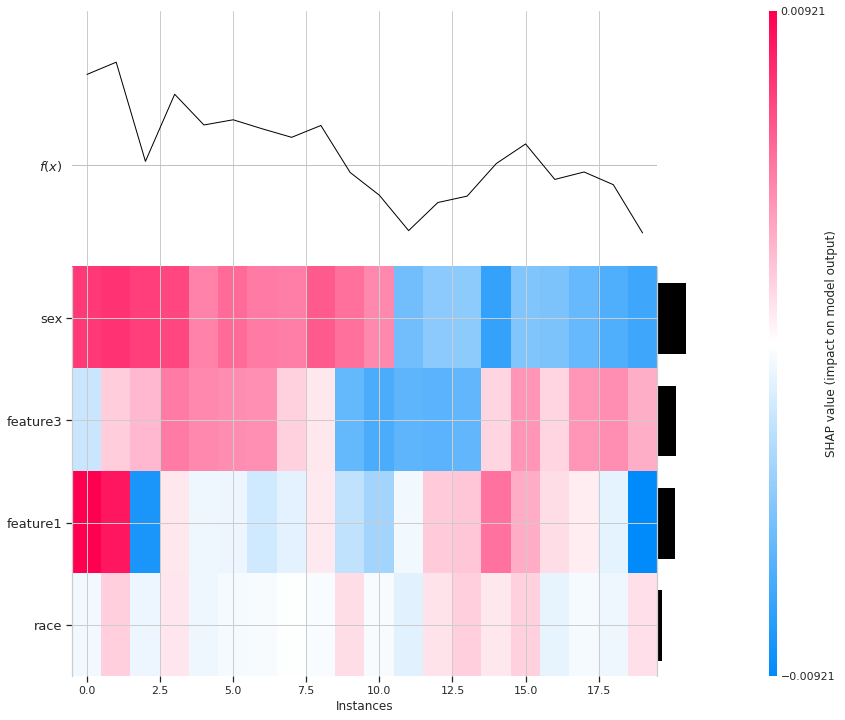

Computing feature importance via permutation shuffling for 4 features using 20 rows with 5 shuffle sets...
	0.47s	= Expected runtime (0.09s per shuffle set)
	0.13s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [7]:
from AutoML.explainer import Explainer

exp = Explainer.from_trainer(trainer)
exp.run()